# Group

Christine Pham, Hayden Bustos, Rachel Le,
John Aguinaga, Bavithra Lakshmanasamy


### *import libraries and data*

In [ ]:
pip install gsw

In [ ]:
import numpy as np
import pandas as pd

# 3D plots (and other plots)
import matplotlib.pyplot as plt

# N^2
import gsw

# visual coordinates
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [ ]:
## importing Rachel's cleaned dataset

df=pd.read_csv("pre_outliers_df.csv")
df.head()

,Cst_Cnt,Depthm,T_degC,Salnty,STheta,Lat_Dec,Lon_Dec
0,1,0,10.50,33.440,25.649,38.833333,-124.083333
1,1,8,10.46,33.440,25.656,38.833333,-124.083333
2,1,10,10.46,33.437,25.654,38.833333,-124.083333
3,1,19,10.45,33.420,25.643,38.833333,-124.083333
4,1,20,10.45,33.421,25.643,38.833333,-124.083333


## **Visulization**
- coordinate visualization
- depth visualization
- surface salinity
- salinity with depth
- surface temperature
- temperature with depth

<ipython-input-5-da9d95c490be>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


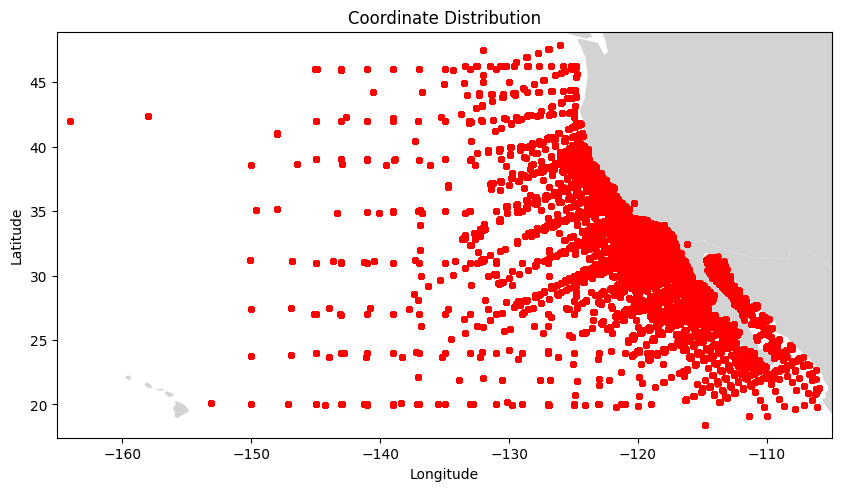

In [ ]:
# coordinate visualization

geometry = [Point(xy) for xy in zip(df['Lon_Dec'], df['Lat_Dec'])]
gdf = GeoDataFrame(df, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

xmin, ymin, xmax, ymax = gdf.total_bounds

buffer = 1
xmin -= buffer
ymin -= buffer
xmax += buffer
ymax += buffer

ax = world.plot(figsize=(10, 6), color="lightgrey")
gdf.plot(ax=ax, marker='o', color='red', markersize=15)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title("Coordinate Distribution")
plt.show()

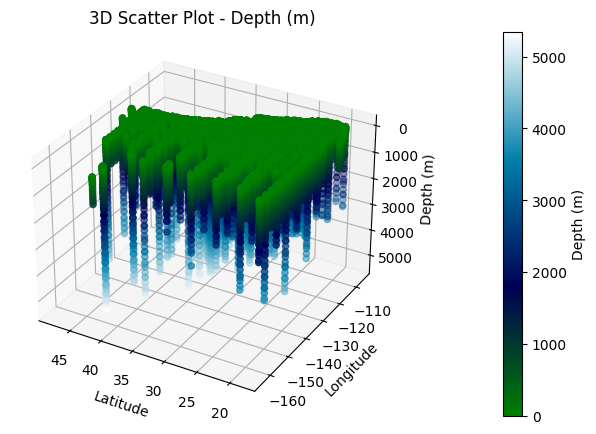

In [ ]:
# depth visualization

ax=plt.axes(projection="3d")
scatter=ax.scatter3D(df["Lat_Dec"],df["Lon_Dec"],df["Depthm"],
             c=df["Depthm"],
             cmap="ocean")

ax.set_zlim(ax.get_zlim()[::-1])
ax.set_xlim(ax.get_xlim()[::-1])

ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Depth (m)')
plt.title('3D Scatter Plot - Depth (m)')

plt.colorbar(scatter, label='Depth (m)')
plt.subplots_adjust(left=0.1, right=3.5, bottom=0.1, top=0.9)

plt.show()

In [ ]:
# create new df for surface data

new_df=df.copy()
surface_df=new_df[new_df["Depthm"]==0]

<ipython-input-47-4e7e1af7ffd2>:8: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



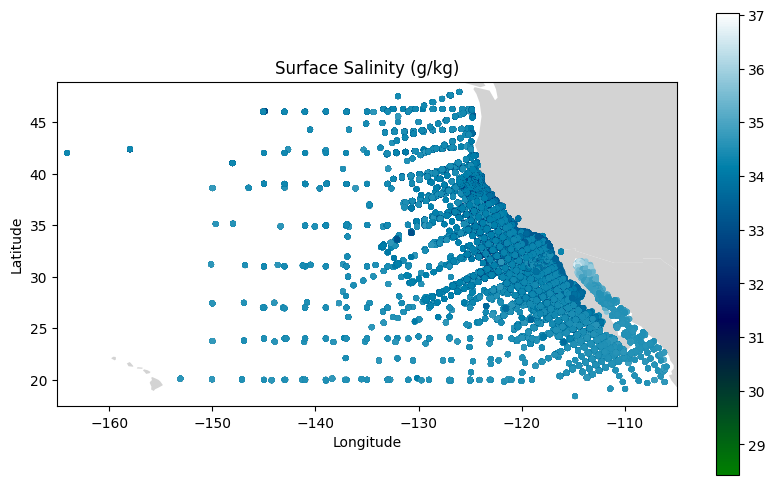

In [ ]:
# surface salinity

# coordinate visualization

geometry = [Point(xy) for xy in zip(df['Lon_Dec'], df['Lat_Dec'])]
gdf = GeoDataFrame(df, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

xmin, ymin, xmax, ymax = gdf.total_bounds

buffer = 1
xmin -= buffer
ymin -= buffer
xmax += buffer
ymax += buffer

ax = world.plot(figsize=(10, 6),color='lightgrey')
gdf.plot(ax=ax, marker='o', column='Salnty', cmap='ocean', markersize=10, legend=True)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title("Surface Salinity (g/kg)")
plt.show()

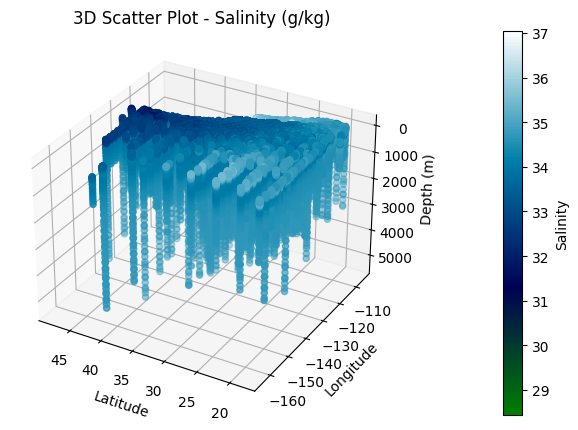

In [ ]:
# 3D gradient map of salinity

ax=plt.axes(projection="3d")
scatter=ax.scatter3D(df["Lat_Dec"],df["Lon_Dec"],df["Depthm"],
             c=df["Salnty"],
             cmap="ocean")

ax.set_zlim(ax.get_zlim()[::-1])
ax.set_xlim(ax.get_xlim()[::-1])

ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Depth (m)')
plt.title('3D Scatter Plot - Salinity (g/kg)')

plt.colorbar(scatter, label='Salinity')
plt.subplots_adjust(left=0.1, right=3.5, bottom=0.1, top=0.9)

plt.show()

<ipython-input-48-a680ddb9ffba>:8: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



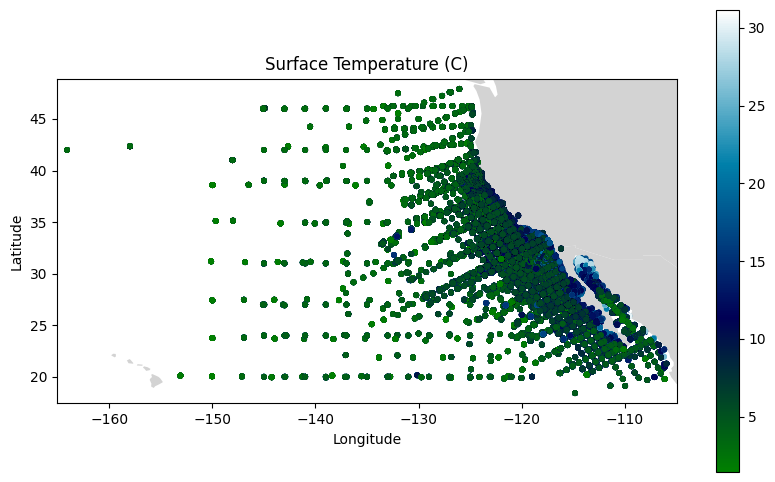

In [ ]:
# surface temp

# coordinate visualization

geometry = [Point(xy) for xy in zip(df['Lon_Dec'], df['Lat_Dec'])]
gdf = GeoDataFrame(df, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

xmin, ymin, xmax, ymax = gdf.total_bounds

buffer = 1
xmin -= buffer
ymin -= buffer
xmax += buffer
ymax += buffer

ax = world.plot(figsize=(10, 6),color='lightgrey')
gdf.plot(ax=ax, marker='o', column='T_degC', cmap='ocean', markersize=10, legend=True)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title("Surface Temperature (C)")
plt.show()

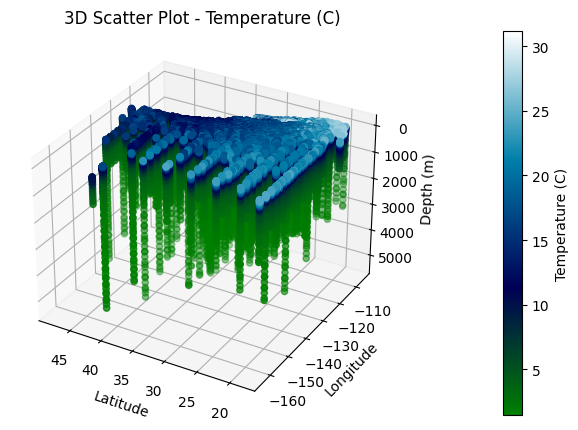

In [ ]:
# 3D mapping of temperature

ax=plt.axes(projection="3d")
scatter=ax.scatter3D(df["Lat_Dec"],df["Lon_Dec"],df["Depthm"],
             c=df["T_degC"],
             cmap="ocean")

ax.set_zlim(ax.get_zlim()[::-1])
ax.set_xlim(ax.get_xlim()[::-1])

ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Depth (m)')
plt.title('3D Scatter Plot - Temperature (C)')

plt.colorbar(scatter, label='Temperature (C)')
plt.subplots_adjust(left=0.1, right=3.5, bottom=0.1, top=0.9)

plt.show()

# ***Feature Engineering***

- block longitude and latitudes
- 1 m of depth = 1 dbar of pressure
- calculate bouyancy frequency (N^2)
  - pycnocline depth can coincide with max N^2

### **Longtitude/Latitude Blocks**

- 5 x 5 blocks
- latitude: 7 divisions
- longitude: 13 divisions

In [ ]:
print(f"latitude range: \n{df['Lat_Dec'].min()}\n{df['Lat_Dec'].max()}")
print(f"\nlongitude range: \n{df['Lon_Dec'].min()}\n{df['Lon_Dec'].max()}")

latitude range: 
18.416666
47.916666

longitude range: 
-164.083333
-105.966666


In [ ]:
# latitude
df["lat_block"] = 0

for index, row in df.iterrows():
    if row["Lat_Dec"] < 20:
        df.at[index, "lat_block"] = 1
    elif 20 <= row["Lat_Dec"] < 25:
        df.at[index, "lat_block"] = 2
    elif 25 <= row["Lat_Dec"] < 30:
        df.at[index, "lat_block"] = 3
    elif 30 <= row["Lat_Dec"] < 35:
        df.at[index, "lat_block"] = 4
    elif 35 <= row["Lat_Dec"] < 40:
        df.at[index, "lat_block"] = 5
    elif 40 <= row["Lat_Dec"] < 45:
        df.at[index, "lat_block"] = 6
    elif row["Lat_Dec"] >= 45:
        df.at[index, "lat_block"] = 7

# longitude
df["lon_block"] = 0

for index, row in df.iterrows():
    if row["Lon_Dec"] < -160:
        df.at[index, "lon_block"] = 1
    elif -160 <= row["Lon_Dec"] < -155:
        df.at[index, "lon_block"] = 2
    elif -155 <= row["Lon_Dec"] < -150:
        df.at[index, "lon_block"] = 3
    elif -150 <= row["Lon_Dec"] < -145:
        df.at[index, "lon_block"] = 4
    elif -145 <= row["Lon_Dec"] < -140:
        df.at[index, "lon_block"] = 5
    elif -140 <= row["Lon_Dec"] < -135:
        df.at[index, "lon_block"] = 6
    elif -135 <= row["Lon_Dec"] < -130:
        df.at[index, "lon_block"] = 7
    elif -130 <= row["Lon_Dec"] < -125:
        df.at[index, "lon_block"] = 8
    elif -125 <= row["Lon_Dec"] < -120:
        df.at[index, "lon_block"] = 9
    elif -120 <= row["Lon_Dec"] < -115:
        df.at[index, "lon_block"] = 10
    elif -115 <= row["Lon_Dec"] < -110:
        df.at[index, "lon_block"] = 11
    elif row["Lon_Dec"] >= -110:
        df.at[index, "lon_block"] = 12

<ipython-input-18-191a0abdf284>:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/usr/local/lib/python3.10/dist-packages/shapely/measurement.py:103: RuntimeWarning: invalid value encountered in bounds
  return lib.bounds(geometry_arr, out=out, **kwargs)


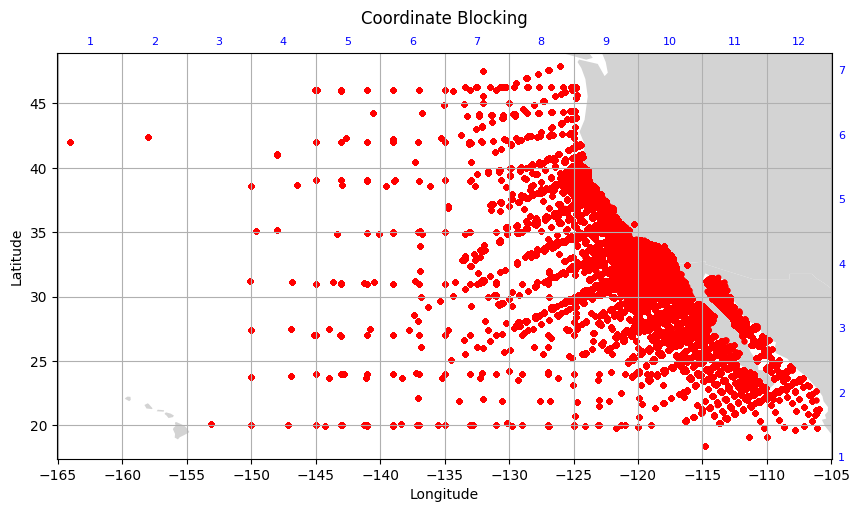

In [ ]:
# add grid for blocking and label them
### add minor grid to label 1-12 for lon and 1-7 for lat

geometry = [Point(xy) for xy in zip(df['Lon_Dec'], df['Lat_Dec'])]
gdf = GeoDataFrame(df, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

xmin, ymin, xmax, ymax = gdf.total_bounds

buffer = 1
xmin -= buffer
ymin -= buffer
xmax += buffer
ymax += buffer

ax = world.plot(figsize=(10, 6), color="lightgrey")
gdf.plot(ax=ax, marker='o', color='red', markersize=10)



lat=np.arange(15, 50, 5)
lon=np.arange(-165, -100, 5)

ax.set_xticks(lon, minor=False)
ax.set_yticks(lat, minor=False)

ax.grid(which="both")

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

lon_=np.arange(-165, -105, 5)
for i, y in enumerate(lat, start=1):
    ax.text(xmax+0.5, y + 2.5, str(i), fontsize=8, ha='left', va='center', color='blue')
for i, x in enumerate(lon_, start=1):
    ax.text(x + 2.5, ymax+0.5, str(i), fontsize=8, ha='center', va='bottom', color='blue')

plt.title("Coordinate Blocking\n")

plt.show()

<ipython-input-37-df4a82211cb1>:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


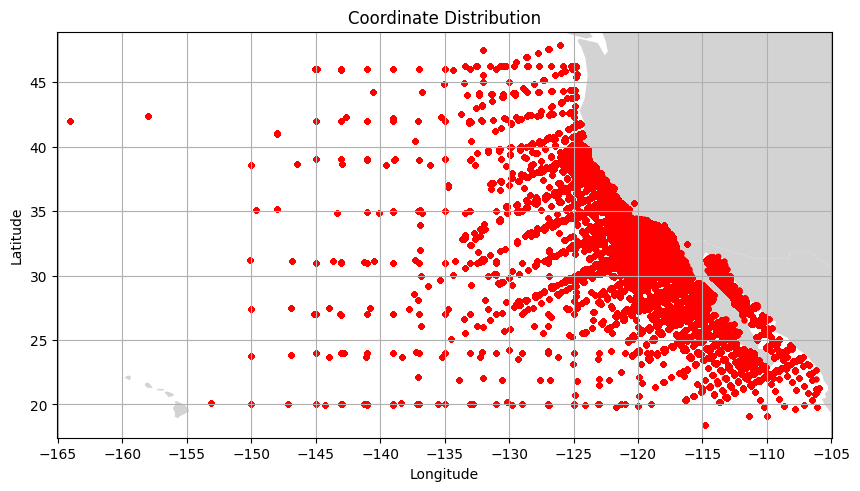

In [ ]:
# add grid for blocking and label them
### add minor grid to label 1-12 for lon and 1-7 for lat

geometry = [Point(xy) for xy in zip(df['Lon_Dec'], df['Lat_Dec'])]
gdf = GeoDataFrame(df, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

xmin, ymin, xmax, ymax = gdf.total_bounds

buffer = 1
xmin -= buffer
ymin -= buffer
xmax += buffer
ymax += buffer

ax = world.plot(figsize=(10, 6), color="lightgrey")
gdf.plot(ax=ax, marker='o', color='red', markersize=10)



lat=np.arange(15, 50, 5)
lon=np.arange(-165, -100, 5)
#lat_minor = np.arange(17.5,47.5,5)
#lon_minor = np.arange(-162.5,-107.5,5)

ax.set_xticks(lon, minor=False)
ax.set_yticks(lat, minor=False)
#ax.set_xticks(lon_minor, minor=True)
#ax.set_yticks(lat_minor, minor=True)

ax.grid(which="both")

#ax2=ax.twinx()
#ax3=ax.twiny()
#ax2.set_xticks(lon_minor)
#ax3.set_yticks(lat_minor)

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
#ax2.set_xlabel("Longitude Block")
#ax3.set_ylabel("Latitude Block")

plt.title("Coordinate Blocking")

#ax.set_aspect('equal', adjustable='box_forced')

plt.show()

### **Pressure**
- 1 m depth = 1 dbar of pressure

### **Bouyancy Frequency (N^2)**
- gsw.stability.Nsquared
- returns one less data point than input
    - uses change in variables to calculate N^2

In [ ]:
# calculate frequency and the depth of occurance

frequency_N2, new_depthm = gsw.stability.Nsquared(SA=df["Salnty"],
                                                   CT=df["T_degC"],
                                                   p=df["Depthm"])

frequency_N2 = np.append(frequency_N2, np.nan) # makes array and df the same length
new_depthm = np.append(new_depthm, np.nan) # makes array and df the same length

df["frequency_N2"]=frequency_N2
df["new_depthm"]=new_depthm

/usr/local/lib/python3.10/dist-packages/gsw/stability.py:86: RuntimeWarning: divide by zero encountered in divide
  N2 = ((g_local**2) / (specvol_mid * db_to_pa * dp))
/usr/local/lib/python3.10/dist-packages/gsw/stability.py:87: RuntimeWarning: invalid value encountered in multiply
  N2 *= (beta_mid*dSA - alpha_mid*dCT)


In [ ]:
# getting rid of frequency_N2 and p_mid_dbar values when the location changes

prev_depth = None
for i in range(len(df)):
    curr_depth = df.at[i, 'Depthm']
    if prev_depth is not None and curr_depth <= prev_depth:
        df['frequency_N2'].iloc[i-1] = np.nan
        df['new_depthm'].iloc[i-1] = np.nan
        prev_depth = None
    prev_depth = curr_depth

Streaming output truncated to the last 5000 lines.
<ipython-input-8-6837c57da3fc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['frequency_N2'].iloc[i-1] = np.nan
<ipython-input-8-6837c57da3fc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_depthm'].iloc[i-1] = np.nan
<ipython-input-8-6837c57da3fc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['frequency_N2'].iloc[i-1] = np.nan
<ipython-input-8-6837c57da3fc>:8: Se

In [ ]:
df

,Cst_Cnt,Depthm,T_degC,Salnty,STheta,Lat_Dec,Lon_Dec,lat_block,lon_block,frequency_N2,new_depthm
0,1,0,10.500,33.4400,25.64900,38.833333,-124.083333,5,9,0.000008,4.0
1,1,8,10.460,33.4400,25.65600,38.833333,-124.083333,5,9,-0.000011,9.0
2,1,10,10.460,33.4370,25.65400,38.833333,-124.083333,5,9,-0.000012,14.5
3,1,19,10.450,33.4200,25.64300,38.833333,-124.083333,5,9,0.000007,19.5
4,1,20,10.450,33.4210,25.64300,38.833333,-124.083333,5,9,0.000007,25.0
...,...,...,...,...,...,...,...,...,...,...,...
812169,34404,0,18.744,33.4083,23.87055,32.953770,-117.279770,4,10,0.000000,1.0
812170,34404,2,18.744,33.4083,23.87072,32.953770,-117.279770,4,10,0.000058,3.5
812171,34404,5,18.692,33.4150,23.88911,32.953770,-117.279770,4,10,0.000239,7.5
812172,34404,10,18.161,33.4062,24.01426,32.953770,-117.279770,4,10,0.000265,12.5


### *Cleaning up df*
- drop: Depthm, T_degC, Salnty, STheta, Lat_Dec, Lon_Dec

In [ ]:
newdf=df.drop(columns=["Depthm", "T_degC", "Salnty", "STheta", "Lat_Dec", "Lon_Dec"])

In [ ]:
# save new df as csv

newdf.to_csv("feature_engineer_df.csv", index=False)